## 0. Setup

This section imports required libraries and sets display/plotting defaults for reproducible EDA.

**Key libraries:**
- `pandas`, `numpy`: data handling
- `matplotlib`, `seaborn`: visualization
- `sklearn`: clustering (operating regimes), scaling, silhouette score

**Output:** environment ready for analysis.


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

sns.set(style='whitegrid')
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

import warnings
warnings.filterwarnings("ignore")

## 1. Load C-MAPSS Training Data (FD001)

Loads the raw `train_FD001.txt` file.

**Note:** C-MAPSS text files contain extra trailing spaces; they often produce empty columns that must be removed.


In [64]:
df = pd.read_csv("CMAPSSData/train_FD001.txt", header=None, sep=" ")
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


## 2. Basic Inspection (Shape / Info / Describe)

Quick checks to understand:
- number of rows and columns
- data types and null values
- summary statistics (ranges, mean, quartiles)

**Why this matters:** confirms the dataset is loaded correctly before applying any transformations.


In [65]:
df.shape

(20631, 28)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20631 non-null  int64  
 1   1       20631 non-null  int64  
 2   2       20631 non-null  float64
 3   3       20631 non-null  float64
 4   4       20631 non-null  float64
 5   5       20631 non-null  float64
 6   6       20631 non-null  float64
 7   7       20631 non-null  float64
 8   8       20631 non-null  float64
 9   9       20631 non-null  float64
 10  10      20631 non-null  float64
 11  11      20631 non-null  float64
 12  12      20631 non-null  float64
 13  13      20631 non-null  float64
 14  14      20631 non-null  float64
 15  15      20631 non-null  float64
 16  16      20631 non-null  float64
 17  17      20631 non-null  float64
 18  18      20631 non-null  float64
 19  19      20631 non-null  float64
 20  20      20631 non-null  float64
 21  21      20631 non-null  int64  
 22

In [67]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,0.0,0.0
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,553.367711,2388.096652,9065.242941,1.3,47.541168,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,NaN,NaN
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,5.329200e-15,0.001389,0.885092,0.070985,22.082880,0.0,0.267087,0.737553,0.071919,19.076176,0.037505,3.469531e-18,1.548763,0.0,0.0,0.180746,0.108251,NaN,NaN
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,549.850000,2387.900000,9021.730000,1.3,46.850000,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,NaN,NaN
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,552.810000,2388.050000,9053.100000,1.3,47.350000,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,NaN,NaN
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,553.440000,2388.090000,9060.660000,1.3,47.510000,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,NaN,NaN
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,554.010000,2388.140000,9069.420000,1.3,47.700000,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,NaN,NaN
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,556.060000,2388.560000,9244.590000,1.3,48.530000,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,NaN,NaN


## 3. Clean Input Format (Drop Extra Columns)

C-MAPSS text files often create 1–2 empty columns due to trailing spaces.
We drop the last two columns to retain the true feature set.

**Output:** correct column count for standard C-MAPSS schema.


In [68]:
df.drop(df.columns[-2:], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20631 non-null  int64  
 1   1       20631 non-null  int64  
 2   2       20631 non-null  float64
 3   3       20631 non-null  float64
 4   4       20631 non-null  float64
 5   5       20631 non-null  float64
 6   6       20631 non-null  float64
 7   7       20631 non-null  float64
 8   8       20631 non-null  float64
 9   9       20631 non-null  float64
 10  10      20631 non-null  float64
 11  11      20631 non-null  float64
 12  12      20631 non-null  float64
 13  13      20631 non-null  float64
 14  14      20631 non-null  float64
 15  15      20631 non-null  float64
 16  16      20631 non-null  float64
 17  17      20631 non-null  float64
 18  18      20631 non-null  float64
 19  19      20631 non-null  float64
 20  20      20631 non-null  float64
 21  21      20631 non-null  int64  
 22

## 4. Assign Column Names (C-MAPSS Standard)

Maps raw columns to:
- identifiers: `engine_id`, `cycle`
- operating settings: `op_setting_1..3`
- sensors: `sensor_1..sensor_21`

**Output:** a structured dataframe with interpretable feature names.


In [69]:
COLUMNS = (
    ["engine_id", "cycle"] +
    [f"op_setting_{i}" for i in range(1, 4)] +
    [f"sensor_{i}" for i in range(1, 22)]
)

df.columns = COLUMNS
df.head(5)

,engine_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


## 5. Data Quality Gate: Schema + Timeline Validations

Validates critical properties needed for time-series / RUL modeling:
- exact expected columns
- missing values overview
- uniqueness of `(engine_id, cycle)`
- cycle values are valid (>= 1)
- per-engine cycles are **monotonic increasing**

**Why this matters:** time-series feature engineering (lags/rolling) and RUL labeling depend on correct ordering.


In [70]:
def schema_checks(df: pd.DataFrame, name: str):
    print(f"=== {name} ===")
    # 1) columns
    assert list(df.columns) == COLUMNS, "Unexpected columns"
    # 2) missing
    miss = df.isna().mean().sort_values(ascending=False)
    print("Missing % (top 5):\n", miss.head())
    # 3) uniqueness
    dup = df.duplicated(["engine_id", "cycle"]).sum()
    print("Duplicate (engine_id,cycle):", dup)
    assert dup == 0, "Duplicates found"
    # 4) non-negative cycle
    assert (df["cycle"] >= 1).all(), "Cycle must be >=1"
    # 5) monotonic cycles per engine
    bad = (df.sort_values(["engine_id","cycle"])
             .groupby("engine_id")["cycle"]
             .apply(lambda s: not s.is_monotonic_increasing)).sum()
    print("Engines with non-monotonic cycles:", bad)
    assert bad == 0, "Non-monotonic cycles detected"

schema_checks(df, "TRAIN")

=== TRAIN ===
Missing % (top 5):
 engine_id    0.0
cycle        0.0
sensor_20    0.0
sensor_19    0.0
sensor_18    0.0
dtype: float64
Duplicate (engine_id,cycle): 0
Engines with non-monotonic cycles: 0


## 6. Fleet Overview: Number of Engines

Counts unique `engine_id` to understand the size of the training fleet.

**Output:** total engines available for training and engine-wise splits.


In [71]:
total_engines = df["engine_id"].nunique()
print(f"Total number of engines: {total_engines}")

Total number of engines: 100


## 7. Fleet Lifecycle Statistics (Cycles to Failure)

Computes lifetime per engine:
- `lifetime(engine) = max(cycle)`

Plots a histogram of engine lifetimes.

**Interpretation:**
- X-axis: cycles until failure
- Y-axis: number of engines in that lifetime range

**Why this matters:** shows variability in lifetimes, which affects model generalization and RUL label distribution.


count    100.000000
mean     206.310000
std       46.342749
min      128.000000
25%      177.000000
50%      199.000000
75%      229.250000
max      362.000000
Name: cycle, dtype: float64


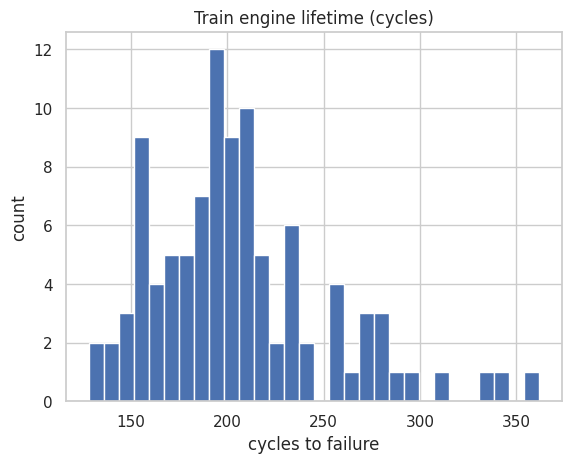

In [72]:
train_life = df.groupby("engine_id")["cycle"].max()

print(train_life.describe())
plt.figure()
plt.hist(train_life, bins=30)
plt.title("Train engine lifetime (cycles)")
plt.xlabel("cycles to failure")
plt.ylabel("count")
plt.show()

## 8. Create Ground-Truth RUL Labels for Training

For training engines, failure point is known (run-to-failure).
RUL at each cycle is computed as:

`RUL = max_cycle(engine) - cycle`

Plots the distribution of uncapped RUL.

**Why this matters:** confirms label generation is correct and shows the natural long-tail of RUL.


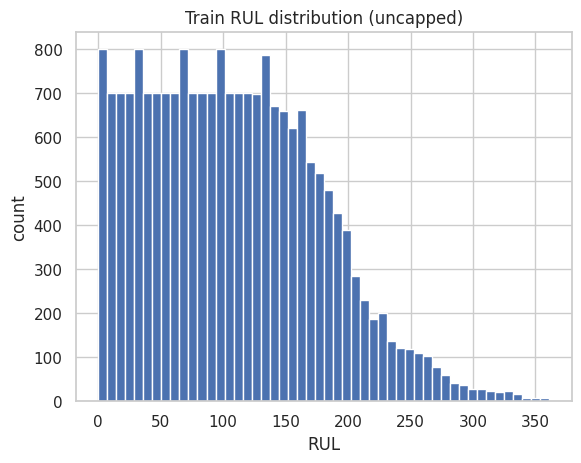

In [74]:
def add_train_rul_labels(df: pd.DataFrame) -> pd.DataFrame:
    max_cycle = df.groupby("engine_id")["cycle"].transform("max")
    df = df.copy()
    df["rul"] = max_cycle - df["cycle"]
    return df

df_rul = add_train_rul_labels(df)

plt.figure()
plt.hist(df_rul["rul"], bins=50)
plt.title("Train RUL distribution (uncapped)")
plt.xlabel("RUL")
plt.ylabel("count")
plt.show()

## 9. Operating Regimes Discovery (Elbow Method)

Operating settings create different regimes (modes of operation).
We scale op settings and run KMeans for multiple `k` values.

**Output:** inertia curve (within-cluster SSE) to identify a reasonable `k`.
**Goal:** choose a small number of regimes that capture operational structure.


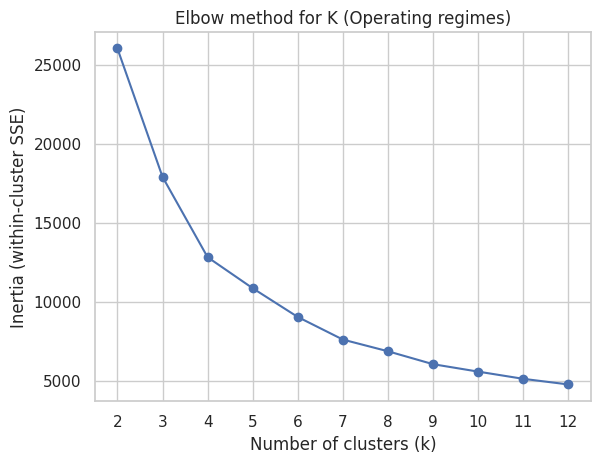

In [ ]:
k_values = range(2, 13)
inertias = []

op_cols = [f"op_setting_{i}" for i in range(1,4)]

X = df[op_cols].values
X_scaled = StandardScaler().fit_transform(X)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    km.fit(X_scaled)
    inertias.append(km.inertia_)


plt.figure()
plt.plot(list(k_values), inertias, marker="o")
plt.title("Elbow method for K (Operating regimes)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (within-cluster SSE)")
plt.xticks(list(k_values))
plt.show()

## 10. Operating Regimes Discovery (Silhouette Score)

Computes silhouette score for each `k` to evaluate cluster separation quality.

**Interpretation:**
- higher silhouette = more distinct clusters
- helps confirm the best `k` beyond just the elbow curve


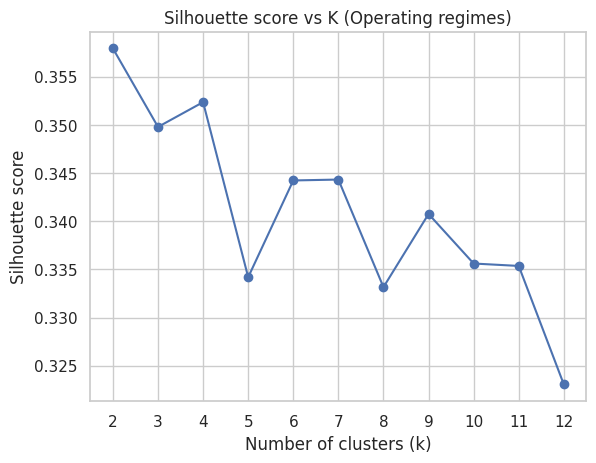

Best k by silhouette: 2
Silhouette scores: {2: 0.35794590132845383, 3: 0.34979664252403186, 4: 0.3523692739851849, 5: 0.3341886301454759, 6: 0.3442369411637392, 7: 0.34433026235131015, 8: 0.3331583273058739, 9: 0.34075498766766865, 10: 0.3356098034934192, 11: 0.33535941490813903, 12: 0.323051544351488}


In [76]:
k_values = range(2, 13)
inertias = []
sil_scores = []

op_cols = [f"op_setting_{i}" for i in range(1, 4)]
X = df[op_cols].values
X_scaled = StandardScaler().fit_transform(X)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = km.fit_predict(X_scaled)

    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

# Plot Silhouette scores
plt.figure()
plt.plot(list(k_values), sil_scores, marker="o")
plt.title("Silhouette score vs K (Operating regimes)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette score")
plt.xticks(list(k_values))
plt.show()

# Print best K by silhouette
best_k = list(k_values)[sil_scores.index(max(sil_scores))]
print("Best k by silhouette:", best_k)
print("Silhouette scores:", dict(zip(k_values, sil_scores)))


## 11. Assign Operating Regime Labels

Fits KMeans with chosen `k` and adds `op_regime` labels to each row.

Plots `op_setting_1 vs op_setting_2` colored by `op_regime`.

**Why the plot shows bands:** some operating settings take discrete values, creating stripe-like patterns.
**Why this matters:** sensors can shift by regime → modeling and monitoring must account for regimes.


   engine_id  cycle  op_setting_1  op_setting_2  op_setting_3  op_regime
0          1      1       -0.0007       -0.0004         100.0          0
1          1      2        0.0019       -0.0003         100.0          3
2          1      3       -0.0043        0.0003         100.0          2
3          1      4        0.0007        0.0000         100.0          3
4          1      5       -0.0019       -0.0002         100.0          0
5          1      6       -0.0043       -0.0001         100.0          0
6          1      7        0.0010        0.0001         100.0          1
7          1      8       -0.0034        0.0003         100.0          2
8          1      9        0.0008        0.0001         100.0          1
9          1     10       -0.0033        0.0001         100.0          2


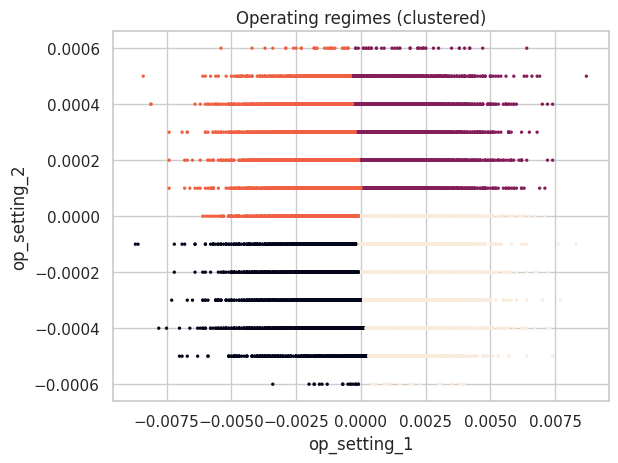

In [ ]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_scaled)
df["op_regime"] = kmeans.labels_

cols_to_show = [
    "engine_id",
    "cycle",
    "op_setting_1",
    "op_setting_2",
    "op_setting_3",
    "op_regime",
]

# Show first 10 rows (as currently ordered)
print(df[cols_to_show].head(10))

plt.figure()
plt.scatter(df["op_setting_1"], df["op_setting_2"], s=2, c=df["op_regime"])
plt.title("Operating regimes (clustered)")
plt.xlabel("op_setting_1")
plt.ylabel("op_setting_2")
plt.show()

Why it looks like horizontal bands?

The op_setting_2 takes only a limited set of values (discrete levels), so points align into stripes.
That indicates the dataset has step-like operating modes rather than continuously varying settings.

This is a useful finding:

Operating conditions are not random noise.

They are structured into a few common modes.

 ## 12. Sensor Quality Checks (Industrial Data Reliability)

This section identifies sensors that may be unreliable or uninformative:
1. **Variance:** near-zero variance sensors are effectively constant → candidates to drop.
2. **Missing rate:** sensors with high missingness require imputation or removal.
3. **Unique value count:** very low unique values indicate flat/stuck sensors.

**Output:**
- `low_var_sensors`
- `flat_sensors`
These lists feed directly into feature selection and production validation rules.


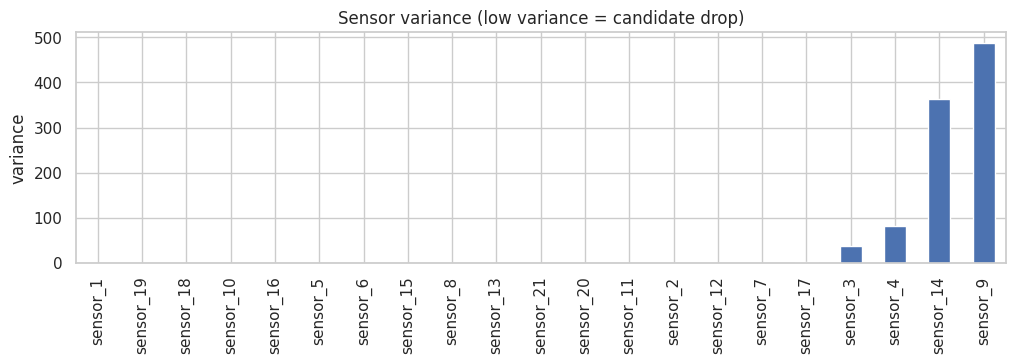

low_var_sensors: ['sensor_1', 'sensor_19', 'sensor_18', 'sensor_10', 'sensor_16', 'sensor_5']


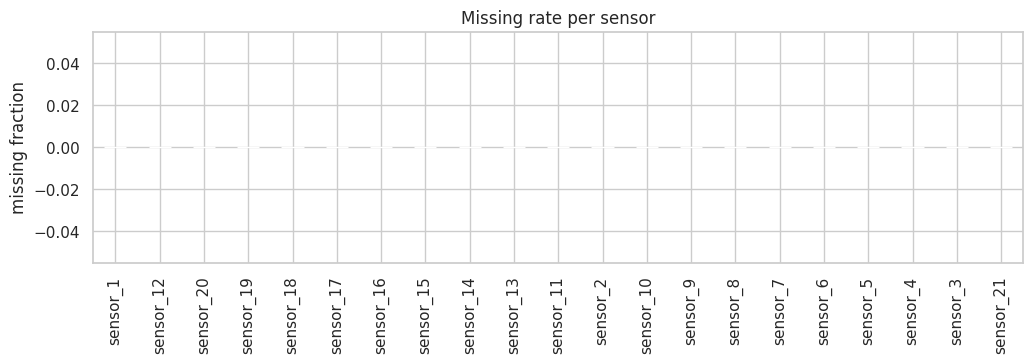

Top 10 missing:
sensor_1     0.0
sensor_12    0.0
sensor_20    0.0
sensor_19    0.0
sensor_18    0.0
dtype: float64


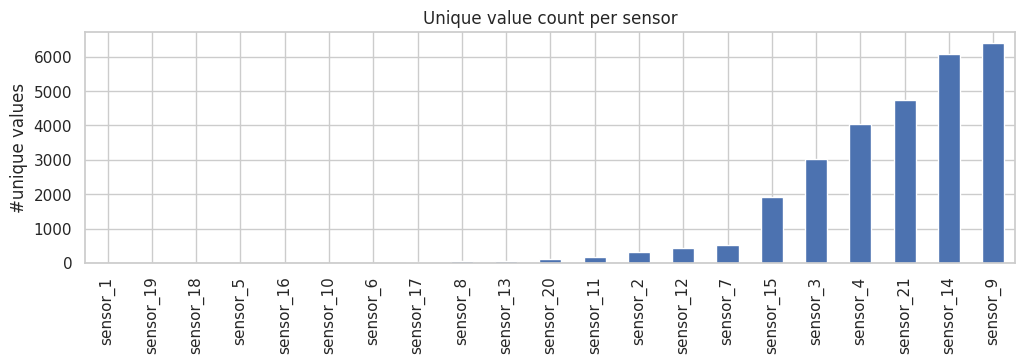

flat_sensors: ['sensor_1', 'sensor_19', 'sensor_18', 'sensor_5', 'sensor_16', 'sensor_10', 'sensor_6']


In [80]:
import matplotlib.pyplot as plt

sensor_cols = [f"sensor_{i}" for i in range(1, 22)]

# 1) Variance
var = df[sensor_cols].var().sort_values()
plt.figure(figsize=(12, 3))
var.plot(kind="bar")
plt.title("Sensor variance (low variance = candidate drop)")
plt.ylabel("variance")
plt.show()

low_var_sensors = var[var < 1e-8].index.tolist()
print("low_var_sensors:", low_var_sensors)

# 2) Missing rate
miss = df[sensor_cols].isna().mean().sort_values(ascending=False)
plt.figure(figsize=(12, 3))
miss.plot(kind="bar")
plt.title("Missing rate per sensor")
plt.ylabel("missing fraction")
plt.show()

print("Top 10 missing:")
print(miss.head(5))

# 3) Unique counts
unique_counts = df[sensor_cols].nunique().sort_values()
plt.figure(figsize=(12, 3))
unique_counts.plot(kind="bar")
plt.title("Unique value count per sensor")
plt.ylabel("#unique values")
plt.show()

flat_sensors = unique_counts[unique_counts <= 2].index.tolist()
print("flat_sensors:", flat_sensors)


## 13. Prognostic Sensor Ranking (PHM Metrics)

Ranks sensors based on how useful they are for RUL prediction:

- **Monotonicity:** sensor changes consistently in one direction during degradation
- **Trendability:** |Spearman(sensor, RUL)| averaged across engines
- **Prognosability:** consistency of endpoint behavior across engines (lower variability is better)

A combined weighted score is computed to produce `rank_df`.

**Why this matters:** selects sensors that carry true degradation signal, not noise or operating-condition artifacts.


In [ ]:
def monotonicity_per_engine(series: pd.Series) -> float:
    # fraction of consecutive diffs with same sign (trend consistency)
    diffs = np.diff(series.values)
    if len(diffs) == 0:
        return np.nan
    return np.abs((diffs > 0).mean() - (diffs < 0).mean())

def compute_phm_scores(df: pd.DataFrame, sensor: str) -> dict:
    # normalize cycle within each engine to compare shapes
    out = {}
    eng_groups = df.sort_values(["engine_id","cycle"]).groupby("engine_id")

    monos = []
    endpoints = []
    trends = []

    for _, g in eng_groups:
        s = g[sensor].values
        if len(s) < 5:
            continue
        monos.append(monotonicity_per_engine(pd.Series(s)))
        endpoints.append(s[-1] - s[0])
        rho, _ = spearmanr(g[sensor].values, g["rul"].values)
        trends.append(rho)

    out["monotonicity_mean"] = float(np.nanmean(monos))
    out["trendability_mean"] = float(np.nanmean(np.abs(trends)))
    out["prognosability_std_endpoint"] = float(np.nanstd(endpoints))
    return out

scores = []
for s in sensor_cols:
    d = compute_phm_scores(df_rul, s)
    d["sensor"] = s
    scores.append(d)

rank_df = pd.DataFrame(scores)
# Higher monotonicity/trendability is better; lower endpoint std is better
rank_df["score"] = (
    0.45*rank_df["monotonicity_mean"] +
    0.45*rank_df["trendability_mean"] +
    0.10*(1.0/(1.0 + rank_df["prognosability_std_endpoint"]))
)
rank_df = rank_df.sort_values("score", ascending=False).reset_index(drop=True)

rank_df.head(10)


,monotonicity_mean,trendability_mean,prognosability_std_endpoint,sensor,score
0,0.038022,0.809681,0.219880,sensor_11,0.463442
1,0.038052,0.710880,0.029321,sensor_15,0.434171
2,0.036842,0.784045,0.621528,sensor_12,0.431069
3,0.036175,0.701841,0.088839,sensor_21,0.423948
4,0.034326,0.703033,0.180324,sensor_20,0.416534
5,0.044567,0.751666,0.737793,sensor_7,0.415849
6,0.034419,0.674849,0.105460,sensor_8,0.409631
7,0.029607,0.679523,0.104908,sensor_13,0.409613
8,0.036342,0.661132,0.474089,sensor_2,0.381702
9,0.035526,0.774117,7.487186,sensor_4,0.376122


1) Monotonicity

A sensor is monotonic if it changes consistently in one direction as the engine degrades.

Example: sensor gradually decreases as failure approaches (mostly down, not up-down-up).

Why it matters: monotonic signals are easier for a model to learn and more stable.

In your code, monotonicity is measured per engine by looking at the signs of consecutive differences (diffs) and seeing whether changes are mostly positive or mostly negative.

2) Trendability

A sensor is trendable if it has a strong relationship with degradation across engines.
In the notebook, this is approximated by |Spearman correlation(sensor, RUL)|, averaged over engines.

Spearman is used because it captures monotonic relationships even if not linear.

High |corr| means the sensor tracks “how close to failure” you are.

3) Prognosability

A sensor is prognosable if different engines end in a similar sensor state at failure.
Intuition:

If at failure, sensor ends near the same level for all engines → good failure indicator.

If failure endpoint varies wildly → harder to use for reliable prediction.

In your code, this is approximated using the standard deviation of endpoint change (s[-1] - s[0]) across engines:

Lower std → more consistent degradation endpoint → better prognosability.

## 14. Redundancy Analysis (Correlation)

Computes the sensor correlation matrix to identify sensors providing duplicate information.

- Heatmap visualizes correlation structure.
- Highly correlated pairs (e.g., |corr| > 0.95) are flagged as redundant.

**Decision rule:** from a highly correlated pair, keep the sensor with better PHM score / lower drift / better data quality.


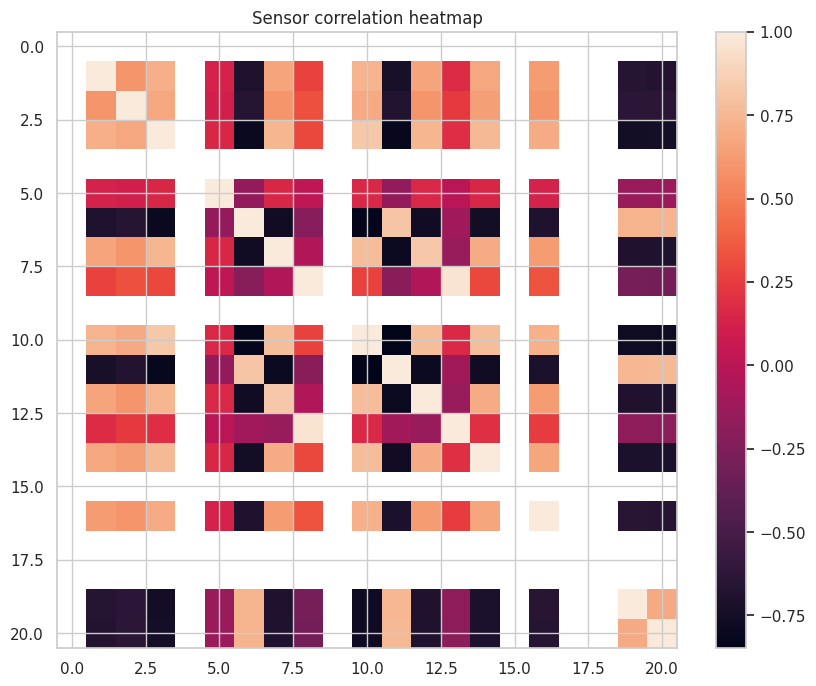

[('sensor_9', 'sensor_14', 0.9631566003059776)]

In [ ]:
corr = df[sensor_cols].corr()
plt.figure(figsize=(10,8))
plt.imshow(corr, aspect="auto")
plt.title("Sensor correlation heatmap")
plt.colorbar()
plt.show()


high_pairs = []
for i, a in enumerate(sensor_cols):
    for b in sensor_cols[i+1:]:
        if abs(corr.loc[a,b]) > 0.95:
            high_pairs.append((a,b,float(corr.loc[a,b])))
high_pairs[:10]

In [84]:
corr = df[sensor_cols].corr().abs()

pairs = (
    corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
        .stack()
        .sort_values(ascending=False)
)

pairs.head(20)


sensor_9   sensor_14    0.963157
sensor_11  sensor_12    0.846884
sensor_4   sensor_11    0.830136
sensor_8   sensor_13    0.826084
sensor_7   sensor_11    0.822805
sensor_4   sensor_12    0.815591
sensor_7   sensor_12    0.812713
sensor_4   sensor_7     0.793130
sensor_12  sensor_13    0.788441
sensor_8   sensor_12    0.786540
           sensor_11    0.782213
sensor_11  sensor_15    0.780913
           sensor_13    0.780761
           sensor_21    0.772554
           sensor_20    0.771510
sensor_7   sensor_8     0.767132
sensor_12  sensor_15    0.766052
sensor_7   sensor_13    0.764611
sensor_4   sensor_15    0.758459
sensor_12  sensor_21    0.756263
dtype: float64

If abs(corr) > 0.95, drop the sensor with:

lower PHM score, or

higher drift score (PSI), or

more missing values / lower variance.

## 15. Train vs Test Drift Check (PSI) — Monitoring Plan

Uses Population Stability Index (PSI) to quantify distribution shift between:
- training sensor distributions (baseline)
- test sensor distributions (proxy for “future / production” data)

**Why this matters for MLOps:**
- identifies which sensors are likely to drift
- defines what to monitor in production
- provides a trigger signal for retraining/investigation


In [87]:
def psi(expected: np.ndarray, actual: np.ndarray, bins=10) -> float:
    # Population Stability Index
    expected = expected[~np.isnan(expected)]
    actual = actual[~np.isnan(actual)]
    breakpoints = np.quantile(expected, np.linspace(0,1,bins+1))
    breakpoints[0] = -np.inf
    breakpoints[-1] = np.inf

    e_perc = np.histogram(expected, bins=breakpoints)[0] / len(expected)
    a_perc = np.histogram(actual, bins=breakpoints)[0] / len(actual)

    e_perc = np.clip(e_perc, 1e-6, None)
    a_perc = np.clip(a_perc, 1e-6, None)

    return float(np.sum((e_perc - a_perc) * np.log(e_perc / a_perc)))

test_df = pd.read_csv("CMAPSSData/test_FD001.txt", header=None, sep=" ")
test_df.drop(test_df.columns[-2:], axis=1, inplace=True)
test_df.columns = COLUMNS

drift_rows = []
for s in sensor_cols:
    drift_rows.append({
        "sensor": s,
        "psi_train_vs_test": psi(df[s].values, test_df[s].values, bins=10)
    })

drift_df = pd.DataFrame(drift_rows).sort_values("psi_train_vs_test", ascending=False).reset_index(drop=True)
drift_df

,sensor,psi_train_vs_test
0,sensor_11,0.347707
1,sensor_4,0.347446
2,sensor_12,0.309622
3,sensor_7,0.292680
4,sensor_15,0.291244
5,sensor_21,0.282120
6,sensor_20,0.271706
7,sensor_2,0.250285
8,sensor_17,0.229165
9,sensor_3,0.222008


PSI = Population Stability Index.
It’s a single number that measures how different two distributions are (expected vs actual).

PSI near 0 → distributions are similar (stable).

Higher PSI → distribution shift (drift).

Typical interpretation (rule-of-thumb):

< 0.1: no meaningful drift

0.1–0.2: moderate drift (watch)

\> 0.2: significant drift (investigate/monitor/retrain)

## 16. cap_RUL Selection (Early-life Saturation)

Goal: choose `rul_cap` where sensors begin to show meaningful degradation signal.

Approach:
- Split training data into RUL bands (0–30, 30–60, …).
- For top prognostic sensors, compute |Spearman(sensor, RUL)| inside each band.
- Plot mean correlation per band.

**Interpretation:**
- High correlation at low RUL = sensors strongly reflect degradation near failure.
- Very low correlation at high RUL = early-life region is hard to distinguish (saturated).
- Choose `rul_cap` near the transition (“elbow”) where correlation starts rising.


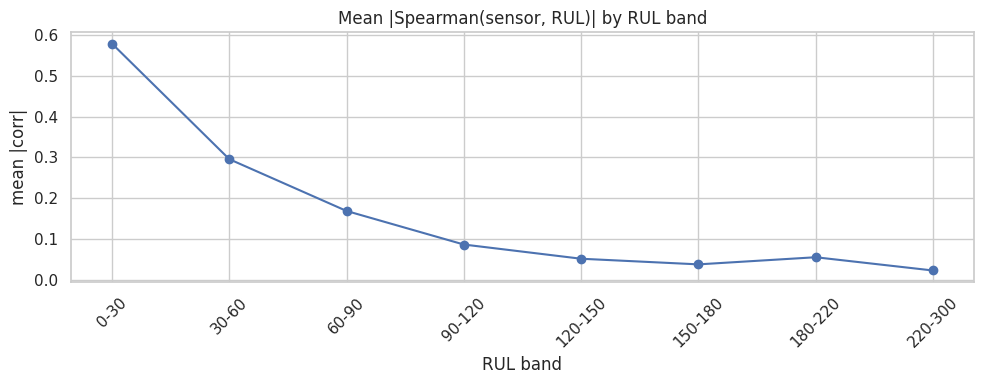

,band,sensor,spearman_abs
0,0-30,sensor_11,0.668570
1,0-30,sensor_15,0.568761
2,0-30,sensor_12,0.589576
3,0-30,sensor_21,0.530303
4,0-30,sensor_20,0.536223
5,30-60,sensor_11,0.340049
6,30-60,sensor_15,0.271729
7,30-60,sensor_12,0.336315
8,30-60,sensor_21,0.268426
9,30-60,sensor_20,0.261926


In [ ]:
TOP_SENSORS = rank_df.head(5)["sensor"].tolist()


bands = [(0, 30), (30, 60), (60, 90), (90, 120), (120, 150), (150, 180), (180, 220), (220, 300)]

rows = []
for lo, hi in bands:
    sub = df_rul[(df_rul["rul"] >= lo) & (df_rul["rul"] < hi)]
    for s in TOP_SENSORS:
        rho, _ = spearmanr(sub[s].values, sub["rul"].values)
        rows.append({"band": f"{lo}-{hi}", "sensor": s, "spearman_abs": float(abs(rho))})

band_corr = pd.DataFrame(rows)

band_order = [f"{lo}-{hi}" for lo, hi in bands]

mean_band = (
    band_corr.groupby("band")["spearman_abs"].mean()
    .reindex(band_order)                 
    .reset_index()
)

plt.figure(figsize=(10,4))
plt.plot(mean_band["band"], mean_band["spearman_abs"], marker="o")
plt.xticks(rotation=45)
plt.title("Mean |Spearman(sensor, RUL)| by RUL band")
plt.xlabel("RUL band")
plt.ylabel("mean |corr|")
plt.tight_layout()
plt.show()

band_corr.head(10)

## 17. Apply `rul_cap` and Compare Label Distributions

Creates `rul_cap = min(rul, cap)` and plots:
- uncapped RUL distribution
- capped RUL distribution

**Why distributions differ:** all values above cap collapse into a spike at the cap value.
**Why this matters:** capping stabilizes training and focuses the model on informative degradation region.


In [91]:
def apply_rul_cap(df: pd.DataFrame, rul_cap: int | None) -> pd.DataFrame:
    df = df.copy()
    if rul_cap is None:
        df["rul_cap"] = df["rul"]
    else:
        df["rul_cap"] = df["rul"].clip(upper=rul_cap)
    return df


rul_cap_value = 135
df = apply_rul_cap(df_rul, rul_cap=rul_cap_value)

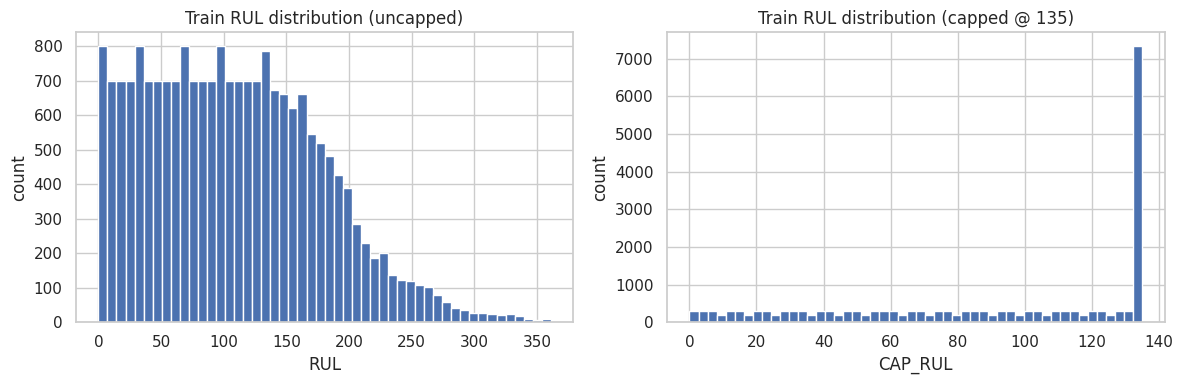

In [93]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(df["rul"], bins=50)
plt.title("Train RUL distribution (uncapped)")
plt.xlabel("RUL")
plt.ylabel("count")

plt.subplot(1,2,2)
plt.hist(df["rul_cap"], bins=50)
plt.title(f"Train RUL distribution (capped @ {rul_cap_value})")
plt.xlabel("CAP_RUL")
plt.ylabel("count")

plt.tight_layout()
plt.show()

## 18. Cycle Continuity Check (No Missing Time Steps)

Even if cycles are monotonic, gaps like 1,2,3,5 can break lag/rolling features.
This cell checks whether cycles increment by 1 for each engine.


In [94]:
def cycle_continuity_report(df: pd.DataFrame, name: str):
    df2 = df.sort_values(["engine_id","cycle"]).copy()
    df2["cycle_diff"] = df2.groupby("engine_id")["cycle"].diff()

    # diffs should be 1 (except first row per engine which is NaN)
    gaps = df2[(df2["cycle_diff"].notna()) & (df2["cycle_diff"] != 1)]
    print(f"=== {name} Cycle Continuity ===")
    print("Total gap rows:", len(gaps))
    if len(gaps) > 0:
        print("Sample gaps:\n", gaps[["engine_id","cycle","cycle_diff"]].head(10))
        print("Engines with gaps:", gaps["engine_id"].nunique())
    return gaps

train_gaps = cycle_continuity_report(df, "TRAIN")

=== TRAIN Cycle Continuity ===
Total gap rows: 0


## 19. Sensor Trajectories (Degradation Visual Evidence)

We plot top-ranked sensors across multiple engines to visually confirm:
- stable degradation trends
- regime effects
- noise/outliers


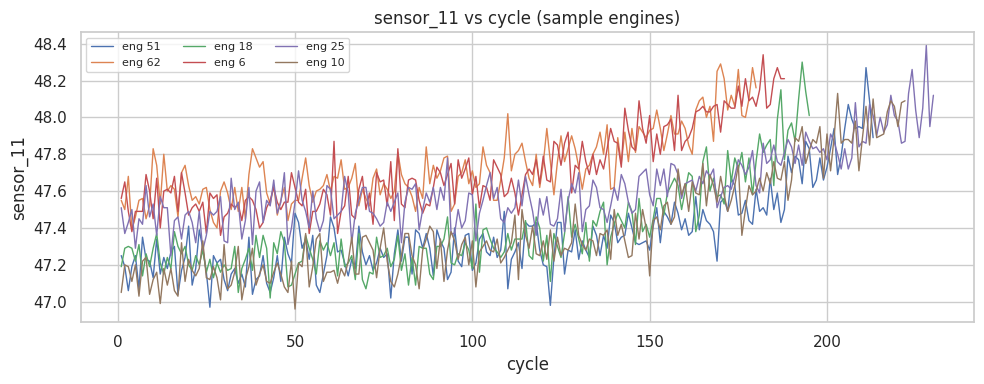

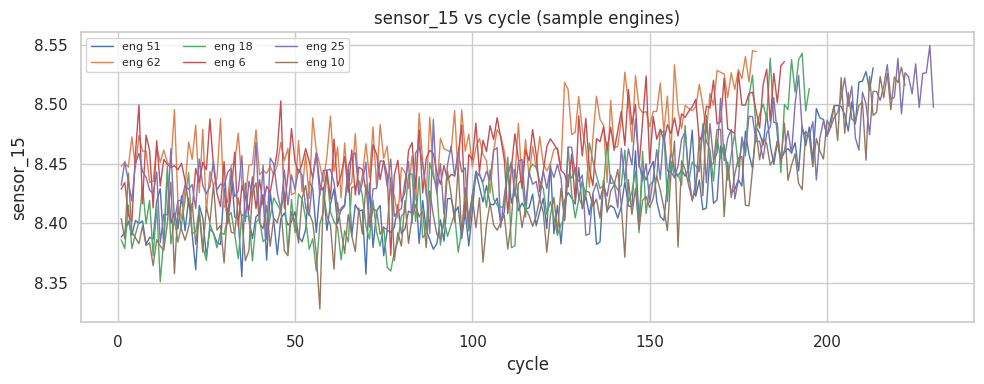

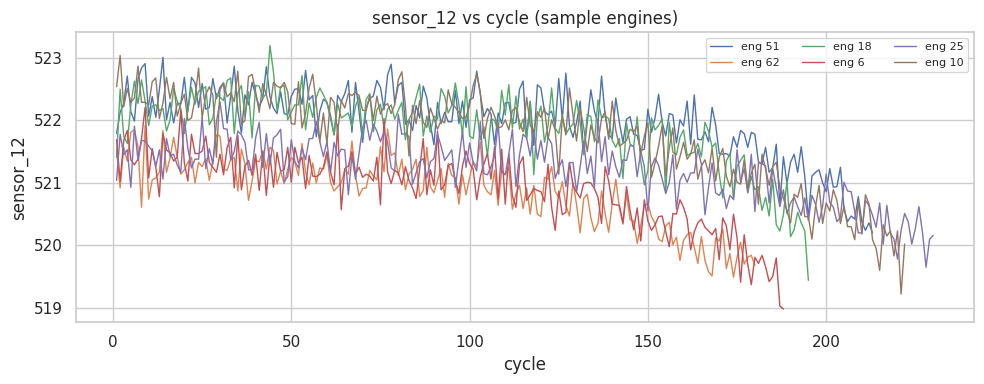

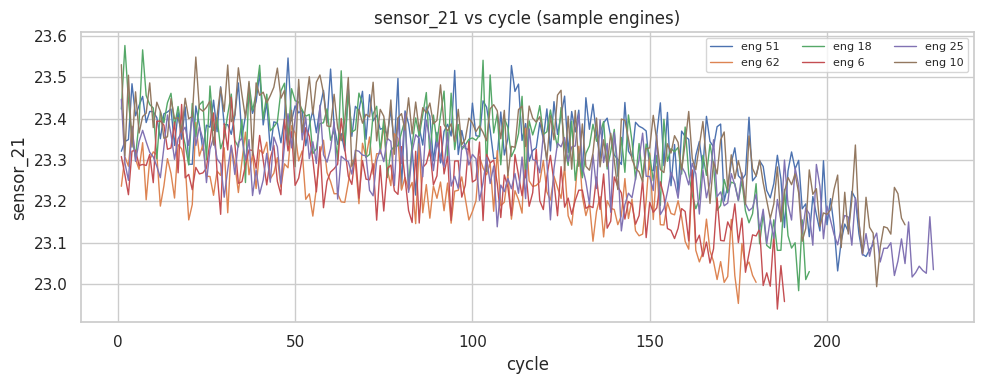

In [ ]:
top_sensors = rank_df.head(4)["sensor"].tolist() if "rank_df" in globals() else ["sensor_2","sensor_3","sensor_4","sensor_7"]

# Sample engines
sample_engines = np.random.choice(df["engine_id"].unique(), size=6, replace=False)

for s in top_sensors:
    plt.figure(figsize=(10,4))
    for eid in sample_engines:
        g = df[df["engine_id"] == eid].sort_values("cycle")
        plt.plot(g["cycle"], g[s], label=f"eng {eid}", linewidth=1)
    plt.title(f"{s} vs cycle (sample engines)")
    plt.xlabel("cycle")
    plt.ylabel(s)
    plt.legend(ncol=3, fontsize=8)
    plt.tight_layout()
    plt.show()


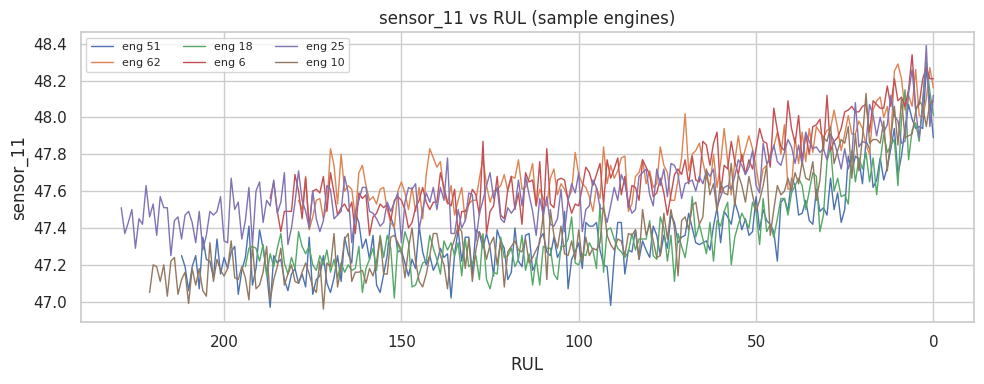

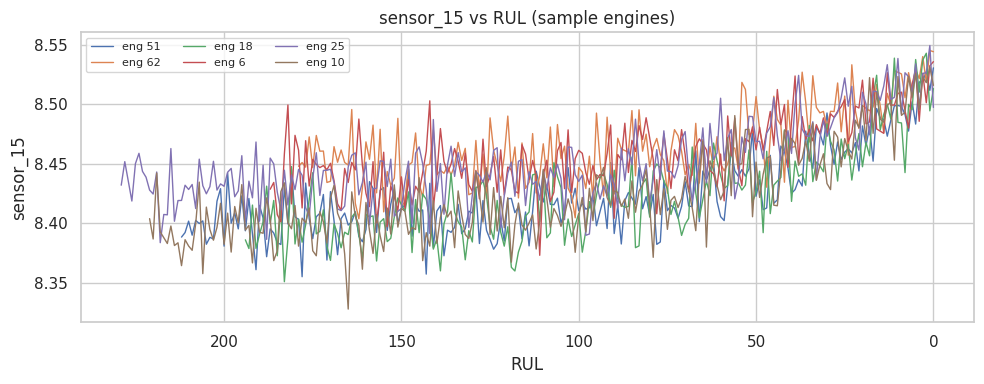

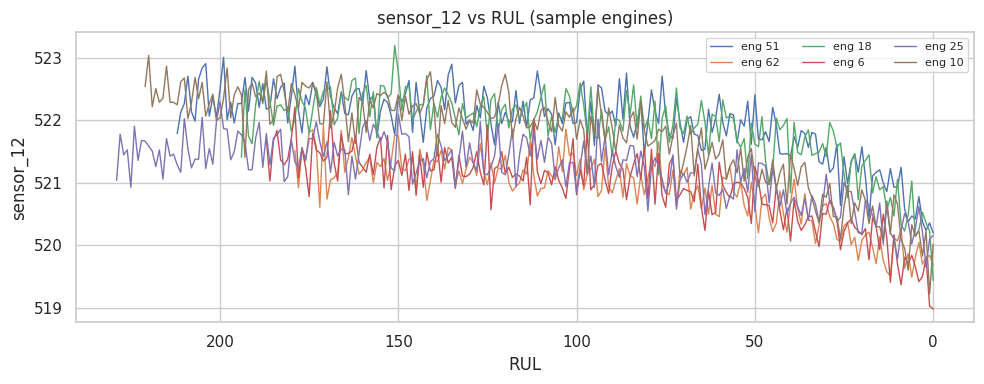

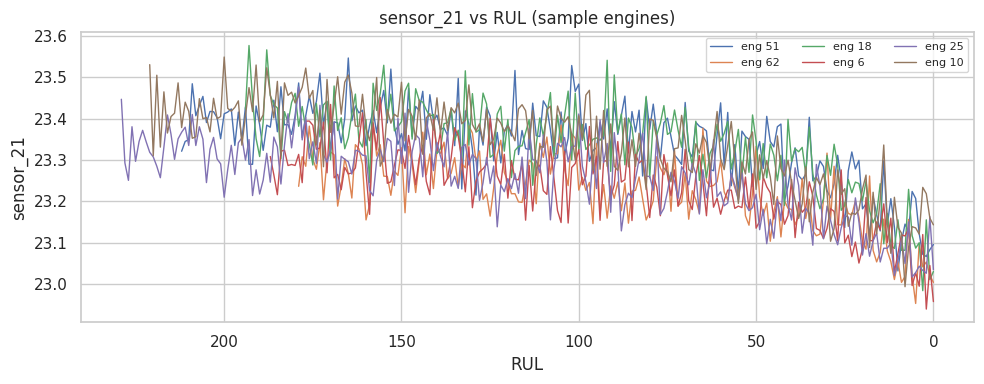

In [100]:
for s in top_sensors:
    plt.figure(figsize=(10,4))
    for eid in sample_engines:
        g = df[df["engine_id"] == eid].sort_values("cycle")
        plt.plot(g["rul"], g[s], label=f"eng {eid}", linewidth=1)
    plt.title(f"{s} vs RUL (sample engines)")
    plt.xlabel("RUL")
    plt.ylabel(s)
    plt.gca().invert_xaxis()
    plt.legend(ncol=3, fontsize=8)
    plt.tight_layout()
    plt.show()
